In [81]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


%matplotlib inline

import SimpleITK as sitk
# Download data to work on

In [168]:
# all_mask_fd = ("MCMrigid_roi_mask_221","MCMrigid_roi_mask_221")
# all_mask_fd = ("ACM_masks","ACM_masks","ACM_masks")

all_mask_fd = ("ACF_masks_z","ACF_masks_z","ACF_masks_z")
# all_mask_fd = ("MCM_masks","MCM_masks","MCM_masks")

colors= ("blue", "orange", "green")

# all_mask_fn = ("fixed_cropped_masked.nii.gz","moving_cropped_masked.nii.gz") 

all_mask_fn = ("ACF_26_021_masked.nii.gz","ACF_26_221_masked.nii.gz","ACF_26_321_masked.nii.gz")

# all_mask_fn = ("MCM_baseline_masked.nii.gz","MCM_30_221_masked.nii.gz","MCM_30_321_masked.nii.gz")

# moving_cropped_masked.nii.gz

ACF_masks ACF_26_021_masked.nii.gz
395.21484375 383.88010787061586 950.0 1.0 14746.507898740208 633450163.0 1650125 6445794.634055346


/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ACF_masks ACF_26_221_masked.nii.gz
412.998046875 416.1971971219778 1143.0 1.0 9432.042482956893 686792383.0 1650161 6445965.995565057


/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ACF_masks ACF_26_321_masked.nii.gz
368.45703125 370.4896242704512 1078.0 2.0 8263.842827835384 544144039.0 1468716 5737166.403606534


/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/robert/miniconda2/envs/fast2/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x432 with 0 Axes>

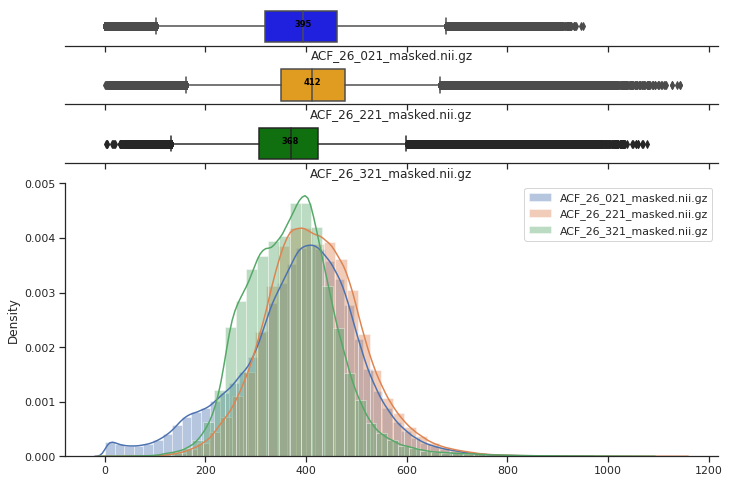

In [169]:
# bins_hist = 800
nf = len(all_mask_fn)
vertical_offset =0
a4_dims = (11.7, 8.27)

sns.set(style="ticks")
label_stats = sitk.LabelStatisticsImageFilter()

label_shape = sitk.LabelShapeStatisticsImageFilter()


# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
#                                     gridspec_kw={"height_ratios": (.25, .75)})

plt.figure(figsize=(20, 6))
f_z0, ax = plt.subplots(nf+1, figsize=a4_dims, sharex=True, 
                                    gridspec_kw={"height_ratios": (.1, 0.1,0.1, .70)})

ind =0

df = pd.DataFrame(columns=['Median','Mean', 'Max','Min','Variance','Sum','Count','Volume'])

for fd,fn in zip(all_mask_fd,all_mask_fn):
    print(fd,fn)
    mask_im= sitk.ReadImage(fd+'/'+fn)
    m_sp = mask_im.GetSpacing()
    label_stats.Execute(mask_im, mask_im > 0)
    st_median = label_stats.GetMedian(1)
    st_mean = label_stats.GetMean(1)
    st_max = label_stats.GetMaximum(1)
    st_min = label_stats.GetMinimum(1)
    st_var = label_stats.GetVariance(1)
    st_sum = label_stats.GetSum(1)
    st_count = label_stats.GetCount(1)
    
    label_shape.Execute(mask_im>0)
    st_vol = label_shape.GetPhysicalSize(1)
#     print(m_sp)
#     st_vol = 0
#     for i in range(3):
#         st_vol += float(st_count) * m_sp[i]
    
    print(st_median, st_mean, st_max, st_min, st_var, st_sum,st_count,st_vol)
    df.loc[len(df), :] = [st_median, st_mean, st_max, st_min, st_var, st_sum,st_count, st_vol]
    nda = sitk.GetArrayViewFromImage(mask_im)
    nda_nz = nda[nda!=0].flatten()

    bp = sns.boxplot(nda_nz, ax = ax[ind], color = colors[ind])
    ax[ind].set(xlabel=fn)
    bp.text(st_median + vertical_offset,0,int(st_median), 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
    sns.distplot(nda_nz, ax=ax[nf], label = fn )    
#     n,b,p = plt.hist(nda[nda!=0].flatten(), bins=bins_hist,range=(0, bins_hist))
#     all_hist [ind] = n
#     plt.hist(nda[nda!=0].flatten(), bins=bins_hist,range=(0, 800))
#     plt.show()
    sns.despine(ax=ax[ind], left=True)
    ax[ind].set(yticks=[])
    ind += 1



sns.despine(ax=ax[nf])

plt.legend()
plt.show()


In [170]:
# plt.boxplot(all_hist.transpose)
print (df)

    Median     Mean   Max Min Variance          Sum    Count       Volume
0  395.215   383.88   950   1  14746.5   6.3345e+08  1650125  6.44579e+06
1  412.998  416.197  1143   1  9432.04  6.86792e+08  1650161  6.44597e+06
2  368.457   370.49  1078   2  8263.84  5.44144e+08  1468716  5.73717e+06


In [ ]:
sns

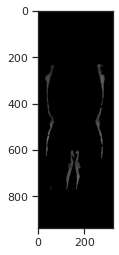

In [134]:
nda = sitk.GetArrayViewFromImage(mask_im[:,:,100])
plt.imshow(nda,cmap="gray", vmin=0, vmax=1000)